Work is done by Sakoyan Margarita
e-mail: magasaqoyan@gmail.com

### Solution of the equation

$d^{5}y/dx^{5} + 15d^{4}y/dx^{4} + 90d^{3}y/dx^{3} + 270d^{2}y/dx^{2} + 405dy/dx + 243y = 0$
  
$x \in [0,5],$   $  y(0) = 0, dy/dx(0) = 3,  d^{2}y/dx^{2}(0) = -9, d^{3}y/dx^{3}(0) = -8, d^{4}y/dx^{4}(0) = 0$

With  Runge-Kutty method of 4th order


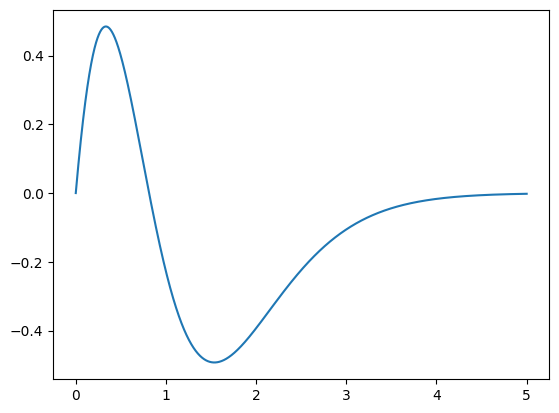

[ 2.99999100e-06  5.99997300e-06  8.99994600e-06 ... -2.06668800e-03
 -2.06668346e-03 -2.06667892e-03]
0


In [ ]:
from math import *
import numpy as np
import matplotlib.pyplot as plt


#Initial Values
x = 0
xf = 5     #interval x
h = 0.000001
m = (xf- x)/h
N = int(m)     #number of iterations
y = [0,3,-9,-8,0]
yarr = []
xarr = []
a = 1.0/6

#Defining the differential equations
def Y(y):
    func = -1*(243*y[0] + 405*y[1] + 270*y[2] + 90*y[3] + 15*y[4])
    return func

def update(y,k,h):
    f = np.zeros((5))
    f[0] = y[0]
    for i in range(4):
        f[i+1] = y[i+1] + h*k
    return f
    
#the main function
def runge_kutta(y, h):
    k4_y = Y(y)
    y_new = update(y,0.5*k4_y,h)
    k3_y = Y(y_new)
    y_new = update(y_new,0.5*k3_y,h)
    k2_y = Y(y_new)
    y_new = update(y,k2_y,h)
    k1_y = Y(y_new)
    
    y4_next = y[4] + a*h*(k1_y+2*(k2_y+k3_y)+k4_y) 
    y3_next = y[3] + h*y4_next
    y2_next = y[2] + h*y3_next
    y1_next = y[1] + h*y2_next
    y0_next = y[0] + h*y1_next
    
    y[4] = y4_next
    y[3] = y3_next
    y[2] = y2_next
    y[1] = y1_next
    y[0] = y0_next

    return y

for i in range(0, N):
    y = runge_kutta(y, h)
    x = x + h
    yarr.append(y[0])
    xarr.append(x)

yarr = np.array(yarr)

# Plot the results
plt.plot(xarr,yarr)
plt.show()

print(yarr)


### Theory

To define the h that our method is sustainable we are using the Lipschitz theorem:

$ C_{2} = C  \Bigg ( \sum \limits_{i} |c_{i}| + h C \sum \limits_{i,j} |c_{i} a_{i,j}| + h^{2} C^{2} \sum \limits_{i,j} |c_{i} a_{i,j}| \Bigg)$,   $C_{2} \approx C e^{Ch}$

The figure above shows that $C \approx 1$, and that will give us $h \approx 10^{-6}  $